# Analysis of Source Genomics Data

Input Datasets:
* 1000 Genomes Project VCF files (phase 3, autosomal chromosomes)
* Personal Genome Project

In [ ]:
!python3 -m pip install -r requirements.txt

In [1]:
# define all imports
import os
import numpy as np  
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# Define global information
figures_datapath = "figures/source_data/"

## 1000 Genomes Project

Download Phase 3 data from [FTP site](http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/).


[**VCF Data**](https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/): info about genetic variants from sequence alignment reads
* low coverage (SNP only)
* high coverage (rare variats/SNV included): [1]((https://www.internationalgenome.org/data-portal/data-collection/30x-grch38)), [2](https://ftp-trace.ncbi.nlm.nih.gov/1000genomes/ftp/1000G_2504_high_coverage/working/), [3](https://explore.anvilproject.org/datasets/63d97e58-a825-4b93-a9a7-0d9d165dc826)

# 1. Population Data

In [ ]:
# 1. Explore sample data distribution
populations = pd.read_csv("data/sources/1000GP/populations.tsv", sep="\t")
populations = populations[:-1] # ignore last row with summary
populations.head()

,Population Description,Population Code,Super Population,DNA from Blood,Offspring available from trios,Pilot Samples,Phase1 Samples,Final Phase Samples,Total
0,"Chinese Dai in Xishuangbanna, China",CDX,EAS,no,yes,0,0,99,99
1,"Han Chinese in Bejing, China",CHB,EAS,no,no,91,97,103,106
2,"Japanese in Tokyo, Japan",JPT,EAS,no,no,94,89,104,105
3,"Kinh in Ho Chi Minh City, Vietnam",KHV,EAS,yes,yes,0,0,101,101
4,"Southern Han Chinese, China",CHS,EAS,no,yes,0,100,108,112


In [4]:
# map population codes to super populations
pop_to_super_pop = {}
super_pop_order = []
for super_pop in populations["Super Population"].unique():
    pop_to_super_pop[super_pop] = populations[populations["Super Population"] == super_pop]["Population Code"].to_list()
    super_pop_order.append(super_pop)

# get order of populatyionns for plotting
# pop_order = [pop_name for superpop in pop_to_super_pop.values() for pop_name in superpop]
# super_pop_order = populations["Super Population"].unique().tolist()

pop_to_super_pop, super_pop_order

({'EAS': ['CDX', 'CHB', 'JPT', 'KHV', 'CHS'],
  'SAS': ['BEB', 'GIH', 'ITU', 'PJL', 'STU'],
  'AFR': ['ASW', 'ACB', 'ESN', 'GWD', 'LWK', 'MSL', 'YRI'],
  'EUR': ['GBR', 'FIN', 'IBS', 'TSI', 'CEU'],
  'AMR': ['CLM', 'MXL', 'PEL', 'PUR']},
 ['EAS', 'SAS', 'AFR', 'EUR', 'AMR'])

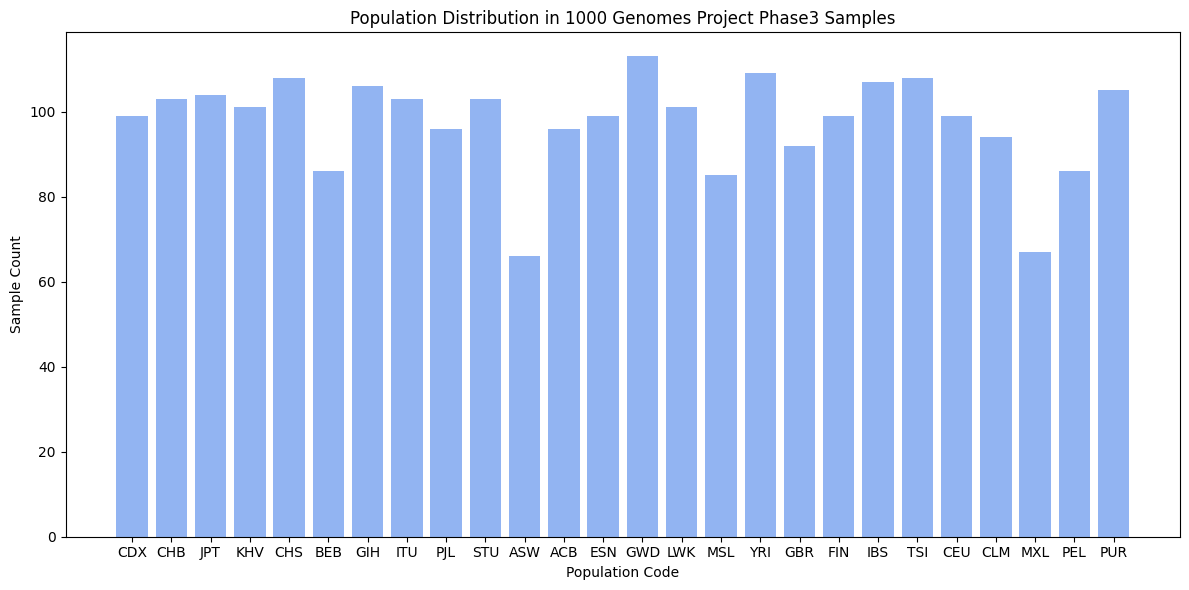

In [6]:
# 1. Plot Population Distribution based on sample counts
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Population Distribution in 1000 Genomes Project Phase3 Samples")

sample_counts = populations["Final Phase Samples"].to_list()
population_codes = populations["Population Code"].to_list()

plt.bar(population_codes, sample_counts, color='cornflowerblue', alpha=0.7)
ax.set_ylabel("Sample Count")
ax.set_xlabel("Population Code")

plt.tight_layout()
plt.savefig(os.path.join(figures_datapath, "population_distribution.pdf"), format='pdf')
plt.show()

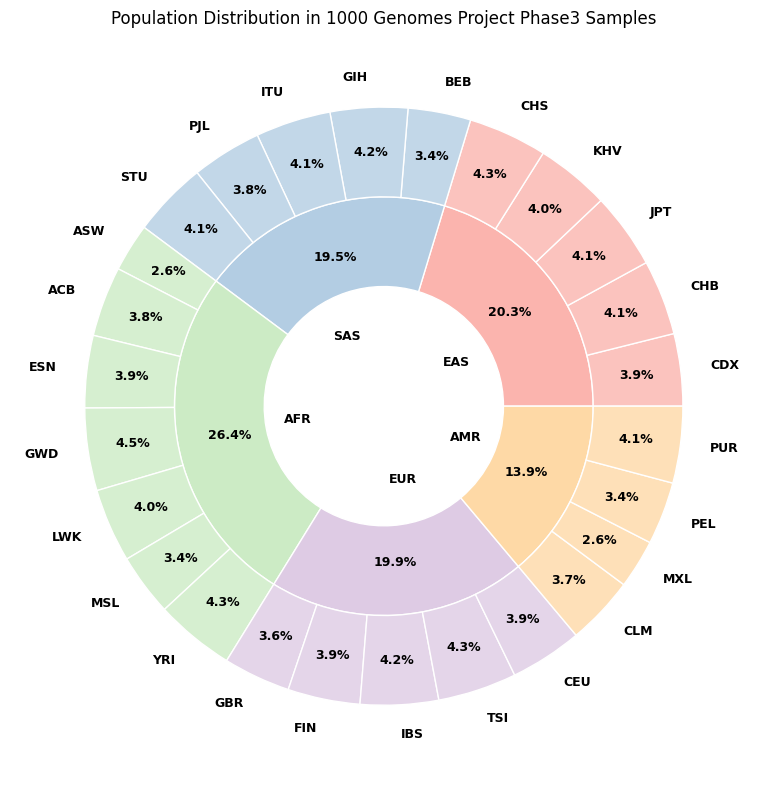

In [ ]:
# 2. Plot SuperPopulation and Population Distribution based on sample counts
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Population Distribution in 1000 Genomes Project Phase3 Samples")

palette = plt.get_cmap("Pastel1")
color_selection = np.arange(len(super_pop_order))
inner_cols = palette(color_selection)
outer_cols = palette(np.repeat(color_selection, [len(pop) for pop in pop_to_super_pop.values()]), alpha=0.8)

second_pie_width = 0.3
# inner chart: super population distribution
super_pop_stats = populations.groupby("Super Population").sum()["Final Phase Samples"][super_pop_order]
super_pop_stats.plot(kind='pie', autopct='%1.1f%%', radius=1-second_pie_width, colors=inner_cols,
                     wedgeprops=dict(width=second_pie_width, edgecolor='w'), labeldistance=0.35, 
                     pctdistance=0.75, textprops={'fontsize': 9, 'fontweight':'bold'})

# outer chart: population sample distribution
ax.pie(populations["Final Phase Samples"].to_list(), labels=populations["Population Code"].to_list(), autopct='%1.1f%%', radius=1, colors=outer_cols,
       wedgeprops=dict(width=second_pie_width, edgecolor='w'), labeldistance=1.1, pctdistance=0.85, textprops={'fontsize': 9, 'fontweight':'bold'})

# ax.set(aspect="equal")
ax.set_ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(figures_datapath, "pop_and_superpop_distribution_pie.pdf"), format='pdf')
plt.show()

In [ ]:
# Sample-level information
samples_info = pd.read_excel("data/sources/1000GP/sample_info.xlsx")
samples_info.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Sample,Family ID,Population,Population Description,Gender,Relationship,Unexpected Parent/Child,Non Paternity,Siblings,Grandparents,Avuncular,Half Siblings,Unknown Second Order,Third Order,Other Comments
0,HG00096,HG00096,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HG00097,HG00097,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HG00098,HG00098,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HG00099,HG00099,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HG00100,HG00100,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_names = samples_info["Sample"].to_list()
len(sample_names), sample_names[:10]

(3500,
 ['HG00096',
  'HG00097',
  'HG00098',
  'HG00099',
  'HG00100',
  'HG00101',
  'HG00102',
  'HG00103',
  'HG00104',
  'HG00105'])

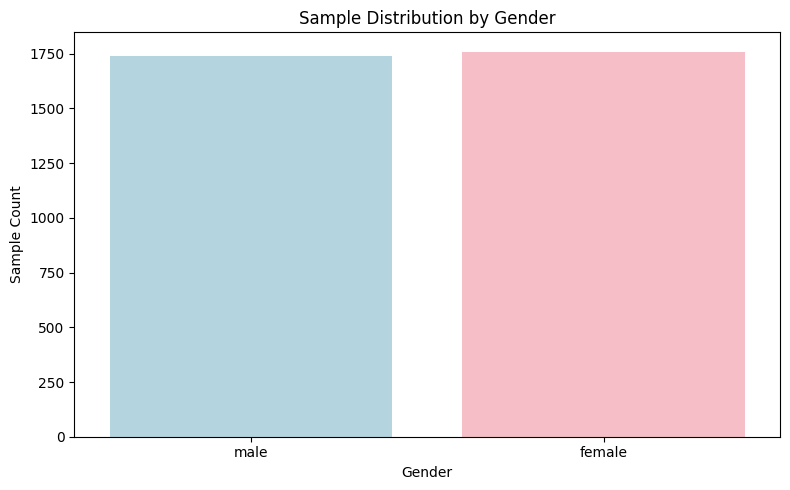

In [67]:
# 3. Plot Sample Distribution by Relationship
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=samples_info, x="Gender", hue="Gender", palette=["lightblue", "lightpink"], ax=ax)
ax.set_title("Sample Distribution by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Sample Count")

plt.tight_layout()
plt.savefig(os.path.join(figures_datapath, "sample_distribution_by_gender.pdf"), format='pdf')
plt.show()

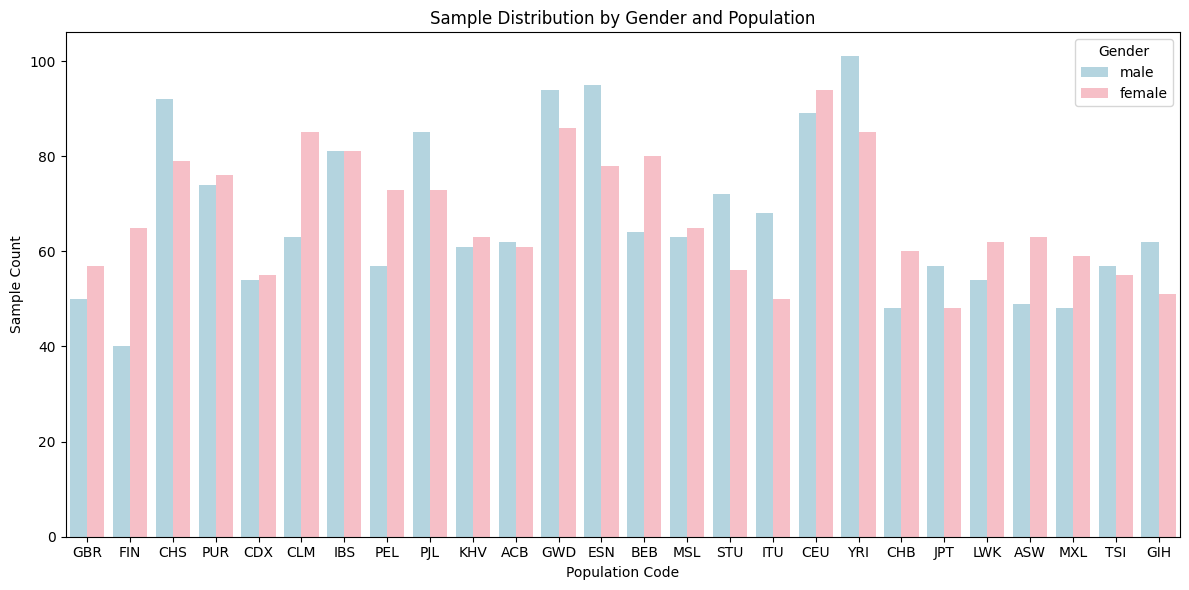

In [8]:
# 3. Plot Sample Distribution by Relationship
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=samples_info, x="Population", hue="Gender", palette=["lightblue", "lightpink"], ax=ax)
ax.set_title("Sample Distribution by Gender and Population")
ax.set_xlabel("Population Code")
ax.set_ylabel("Sample Count")

plt.tight_layout()
plt.savefig(os.path.join(figures_datapath, "pop_distribution_by_gender.pdf"), format='pdf')
plt.show()

In [ ]:
# Sample-level information
samples_info = pd.read_excel("data/sources/1000GP/sample_info.xlsx")
sample_list = samples_info["Sample"].to_list()
samples_info.head()

sample_relationships = pd.read_csv("data/sources/1000GP/sample_lookup.csv", sep="\t")
print(sample_relationships.head())
min_counts = 10
relationships = sample_relationships['Relationship'].value_counts()
other_relationships = relationships[relationships < min_counts].index.tolist()
print("Non-major relationship categories:", other_relationships)

def group_relationships(df_row, labels_to_group, new_label):
    if df_row['Relationship'] in labels_to_group:
        df_row['Relationship'] = new_label

sample_relationships.apply(group_relationships, axis=1, labels_to_group=other_relationships, new_label="Other")
# relationships = relationships.drop(labels=other_relationships, axis=0)
relationships = sample_relationships['Relationship'].value_counts()
labels = relationships.index.tolist()
print(f"\nGrouped {len(other_relationships)} relationship categories with less than {min_counts} samples.\n")
labels, relationships, other_relationships

    Sample Population Superpopulation Relationship
0  HG00096        GBR             EUR          NaN
1  HG00097        GBR             EUR          NaN
2  HG00098        GBR             EUR          NaN
3  HG00099        GBR             EUR          NaN
4  HG00100        GBR             EUR          NaN
Non-major relationship categories: ['Child2', 'not father', 'husband of Child', 'pat grandmother; mother', 'child of 19752&3', 'child of 19740', 'child of 19672', 'paternal grandmother', 'mat grandmother; mother', 'mat grandfather; father', 'pat grandfather; father', 'wife of child', 'mother; child', 'father; child', 'daughter', 'Child', 'paternal father', 'paternal brother', 'maternal grandmother', 'child of 19764']

Grouped 20 relationship categories with less than 10 samples.



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(['mother',
  'father',
  'child',
  'unrel',
  'mat grandmother',
  'mat grandfather',
  'Other',
  'pat grandfather',
  'pat grandmother'],
 Relationship
 mother             831
 father             816
 child              693
 unrel              106
 mat grandmother     31
 mat grandfather     29
 Other               28
 pat grandfather     28
 pat grandmother     28
 Name: count, dtype: int64,
 ['Child2',
  'not father',
  'husband of Child',
  'pat grandmother; mother',
  'child of 19752&3',
  'child of 19740',
  'child of 19672',
  'paternal grandmother',
  'mat grandmother; mother',
  'mat grandfather; father',
  'pat grandfather; father',
  'wife of child',
  'mother; child',
  'father; child',
  'daughter',
  'Child',
  'paternal father',
  'paternal brother',
  'maternal grandmother',
  'child of 19764'])

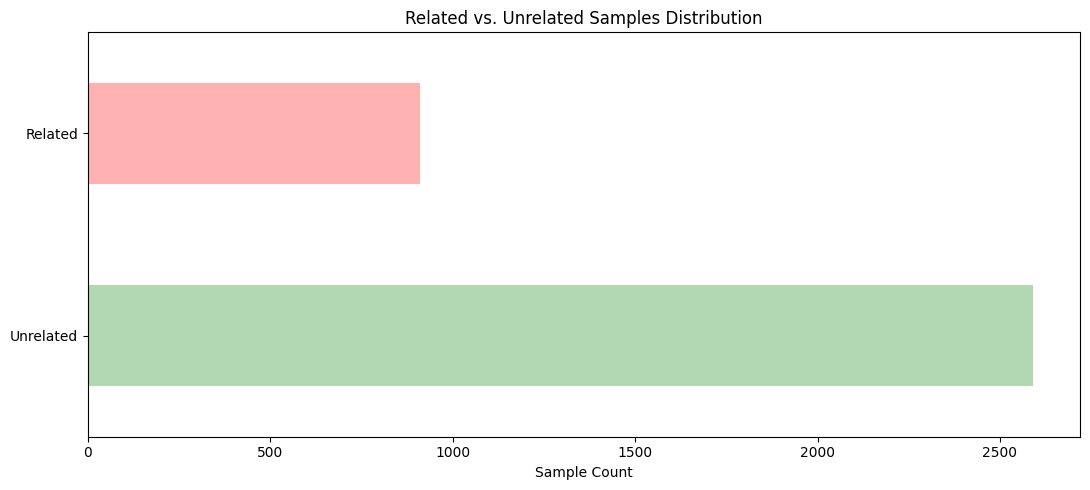

In [47]:
# 3. Plot Unrelated vs Related Sample Distribution
fig, ax = plt.subplots(figsize=(11, 5))
sample_relationships['Relationship'].notna().value_counts().plot(kind='barh', 
                                                                color=["green", "red"],
                                                                alpha=0.3,) 
ax.set_title("Related vs. Unrelated Samples Distribution")
ax.set_xlabel("Sample Count")
ax.set_yticklabels(["Unrelated", "Related"])
ax.set_ylabel("")

plt.tight_layout()
plt.savefig(os.path.join(figures_datapath, "related_vs_unrelated_samples.pdf"), format='pdf')
plt.show()

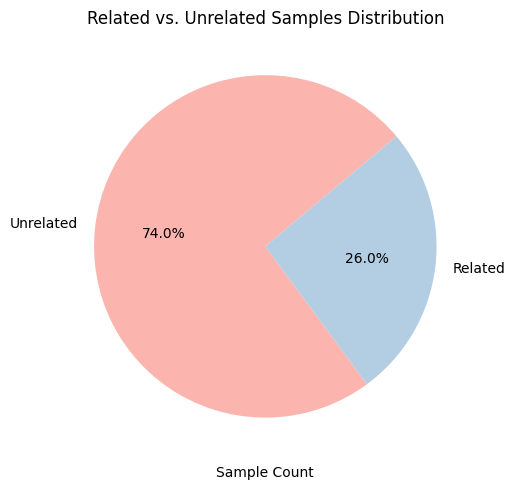

In [48]:
# 3. Plot Unrelated vs Related Sample Distribution
fig, ax = plt.subplots(figsize=(11, 5))

palette = plt.get_cmap("Pastel1")
color_selection = np.arange(len(super_pop_order))

# sample_relationships['Relationship'].notna().value_counts().plot(kind='barh', 
#                                                                 color=["green", "red"],
#                                                                 alpha=0.3) 
sample_relationships['Relationship'].notna().value_counts().plot(kind='pie', 
                                                                # colors=["green", "red"],
                                                                colors=palette(color_selection),
                                                                labels=["Unrelated", "Related"],
                                                                autopct='%1.1f%%',
                                                                startangle=40) 
ax.set_title("Related vs. Unrelated Samples Distribution")
ax.set_xlabel("Sample Count")
ax.set_ylabel("")

plt.tight_layout()
# plt.savefig(os.path.join(figures_datapath, "related_vs_unrelated_samples.pdf"), format='pdf')
plt.show()

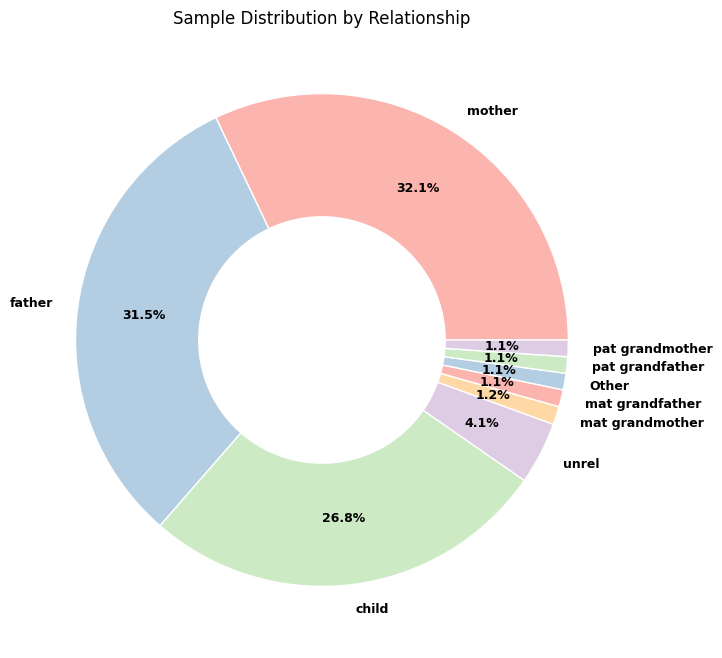

In [ ]:
# 3. Plot Sample Distribution by Relationship
fig, ax = plt.subplots(figsize=(8, 8))

palette = plt.get_cmap("Pastel1")
color_selection = np.arange(len(super_pop_order))

second_pie_width = 0.5
# related samples relathipship types
ax.pie(relationships, labels=labels, radius=1, colors=palette(color_selection),
       wedgeprops=dict(width=second_pie_width, edgecolor='w'), labeldistance=1.1, 
        autopct='%1.1f%%', pctdistance=0.73, 
        textprops={'fontsize': 9, 'fontweight':'bold'})

ax.set_title("Sample Distribution by Relationship")
ax.set_xlabel("")
ax.set_ylabel("")

plt.savefig(os.path.join(figures_datapath, "sample_distribution_by_relationship.pdf"), format='pdf')
plt.show()

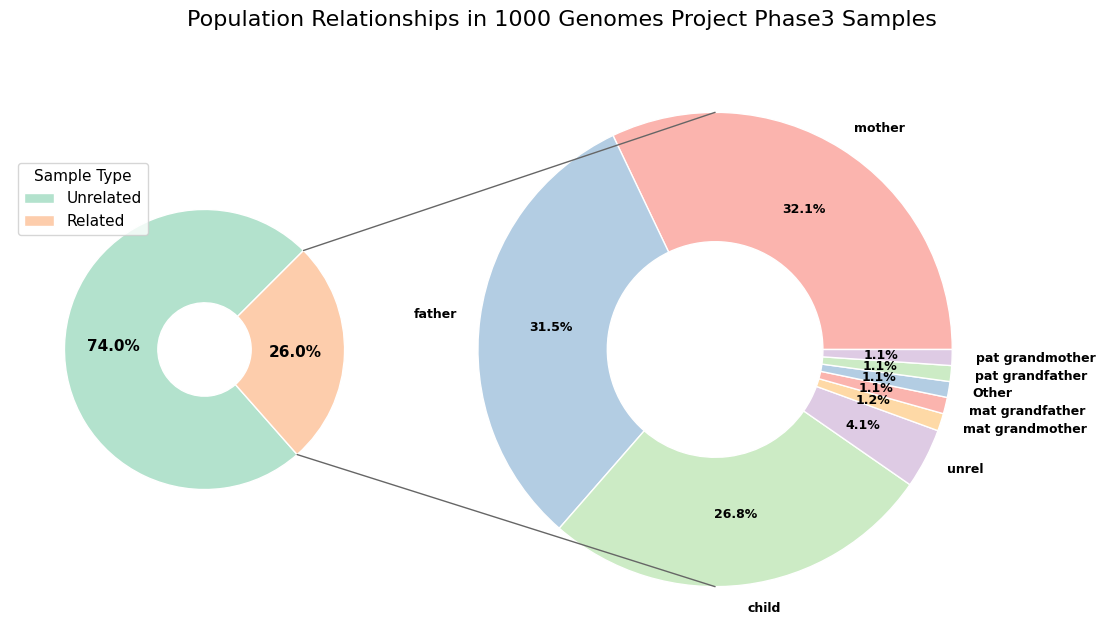

In [337]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), 
                               gridspec_kw={'width_ratios': [0.8, 2.2]})
fig.subplots_adjust(wspace=-0.3)
fig.suptitle("Population Relationships in 1000 Genomes Project Phase3 Samples", 
             fontsize=16, x=0.47)

palette = plt.get_cmap("Pastel2")
color_selection = np.arange(len(super_pop_order))

# left pie chart
first_pie_width = 0.6
first_pie_radius = 0.9
rel_vs_unrel = sample_relationships['Relationship'].notna().value_counts()
rel_vs_unrel = [rel_vs_unrel.iloc[i] for i in [0, 1]]  # Unrelated, Related
wedges, _, _ = ax1.pie(rel_vs_unrel, radius=first_pie_radius, colors=palette(color_selection),
        wedgeprops=dict(width=first_pie_width, edgecolor='w'), labeldistance=1.1,
        startangle=45, autopct='%1.1f%%', pctdistance=0.65,
        textprops={'fontsize': 11, 'fontweight':'bold'})
ax1.legend(wedges, ["Unrelated", "Related"], loc='upper left', fontsize=11, 
           title="Sample Type", title_fontsize='11')

# ax1.set_title('Unrelated vs Related Samples')
ax1.set_xlabel("")
ax1.set_ylabel("")

# right pie chart
second_pie_width = 0.6
second_pie_radius = 1.1
palette = plt.get_cmap("Pastel1")

# related samples relathipship types
ax2.pie(relationships, radius=second_pie_radius, colors=palette(color_selection),
        wedgeprops=dict(width=second_pie_width, edgecolor='w'), labeldistance=1.1, 
        autopct='%1.1f%%', pctdistance=0.7, labels=labels,
        textprops={'fontsize': 9, 'fontweight':'bold'})
    
# ax2.set_title('Samples\' Relationship Types')
ax2.set_xlabel("")
ax2.set_ylabel("")

# connecting lines
from matplotlib.patches import ConnectionPatch

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r

# top line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-0., -second_pie_radius), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0.4, 0.4, 0.4])
con.set_linewidth(1)
ax2.add_artist(con)

# bottom line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-0., second_pie_radius), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0.4, 0.4, 0.4])
con.set_linewidth(1)
ax2.add_artist(con)

plt.savefig(os.path.join(figures_datapath, "population_relationships.pdf"), format='pdf')
plt.show()

# 2. Mutation Data

In [8]:
from importlib import reload
import metrics
reload(metrics)
from metrics import *

In [ ]:
from data.data_utils import get_sequences_from_file
from metrics import *

SOURCE_DATA_FIGURES = 'figures/source_data'
UTILITY_FIGURES = 'figures/generated_data/utility_eval'
PRIVACY_FIGURES = 'figures/generated_data/privacy_eval'

data_size = 'medium'
TRAIN_DATA = f'data/sources/json/{data_size}/train_gts_with_pop.json' 
HOLDOUT_DATA = f'data/sources/json/{data_size}/holdout_gts_with_pop.json'
VAL_DATA = f'data/sources/json/{data_size}/val_gts_with_pop.json'

# HAPNEST_DATAPATH = get_data_dir(dataset='hapnest', type='data', flags='H')

chrom = '22'
model_version = 1
num_samples = 100  # 2504
plot_sample_wise = True

train_color = 'cornflowerblue'
holdout_color = 'mediumorchid'
rare_color = 'red'

In [4]:
training_gts = get_sequences_from_file(TRAIN_DATA)
training_gts = [gt['genotypes'] for gt in training_gts]
train_valid_sequences, train_valid_sequences_ratio, all_train_sequences = get_valid_sequences(training_gts, has_sample_names=True, sample_wise=plot_sample_wise)

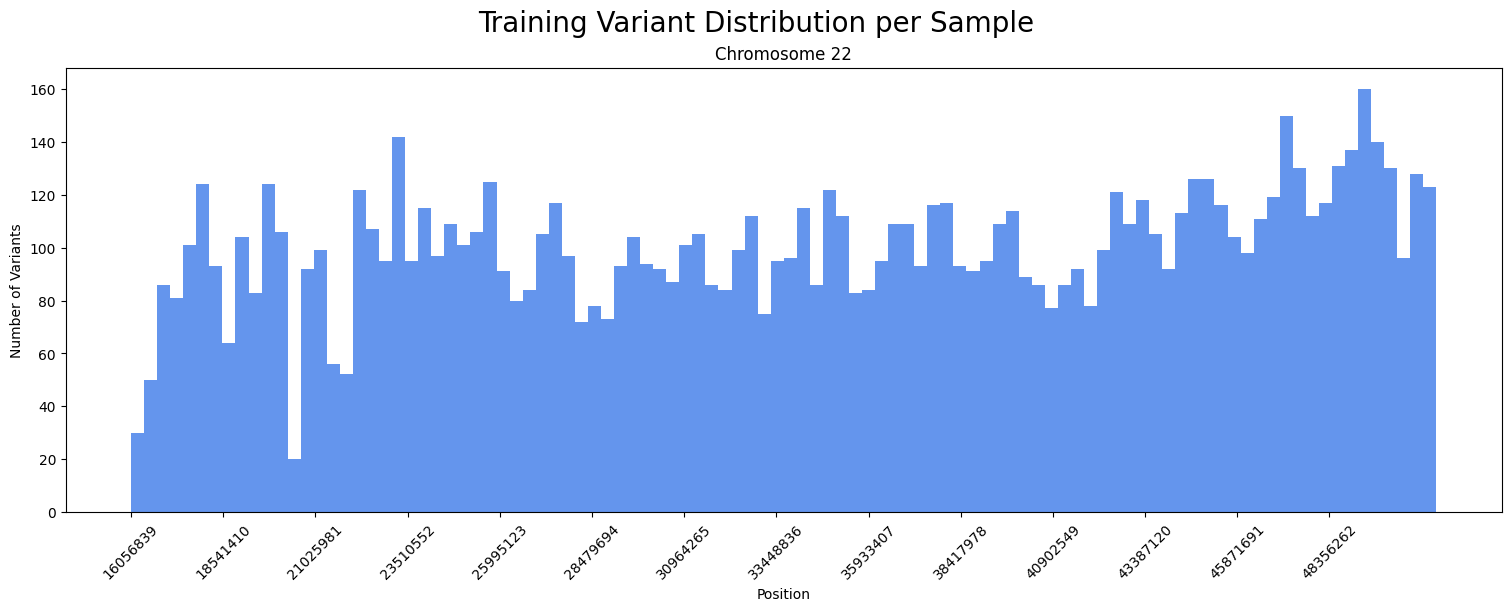

In [ ]:
plot_variant_distribution(train_valid_sequences[0], title = "Training Variant Distribution per Sample", 
                        num_bins = 100, plot_alts_only=False, colors = [train_color],
                        save_path=f'{SOURCE_DATA_FIGURES}/training_data_variant_dist')

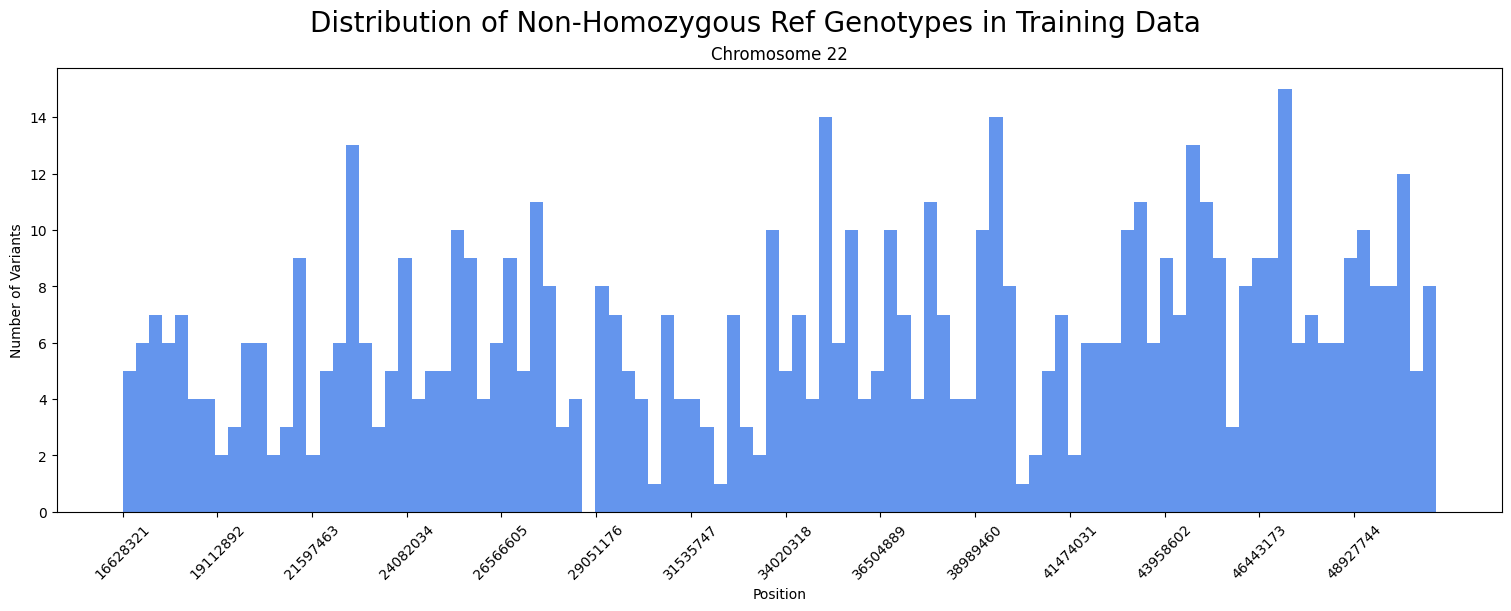

In [ ]:
plot_variant_distribution(train_valid_sequences[0], title = "Distribution of Non-Homozygous Ref Genotypes in Training Data", 
                        num_bins = 100, plot_alts_only=True, colors = [train_color],
                        save_path=f'{SOURCE_DATA_FIGURES}/training_data_alts_dist')

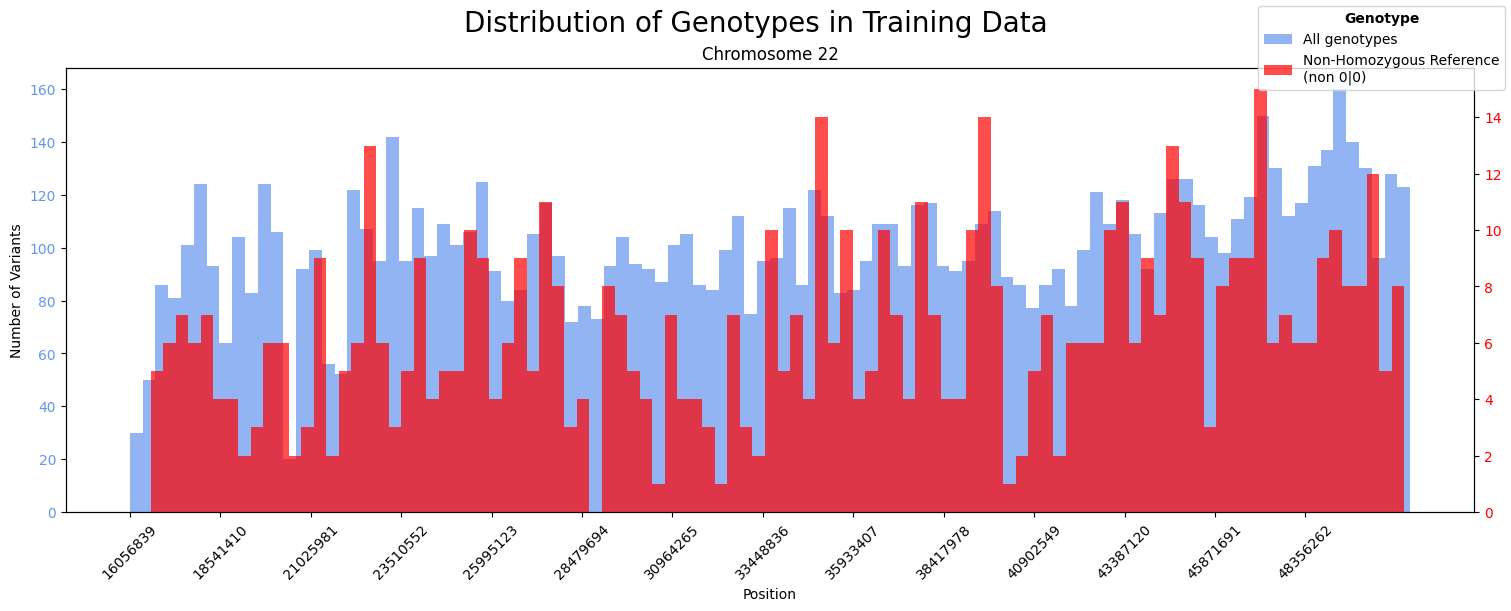

In [30]:
plot_variant_distribution([train_valid_sequences[0], train_valid_sequences[0]],
                        title = "Distribution of Genotypes in Training Data", 
                        num_bins = 100, plot_alts_only=[False, True], colors = [train_color, rare_color],
                        model_names = ['All genotypes', 'Non-Homozygous Reference\n(non 0|0)'], share_axis = False,
                        legend_title = "Genotype",
                        save_path=f'{SOURCE_DATA_FIGURES}/training_genotypes_dist')

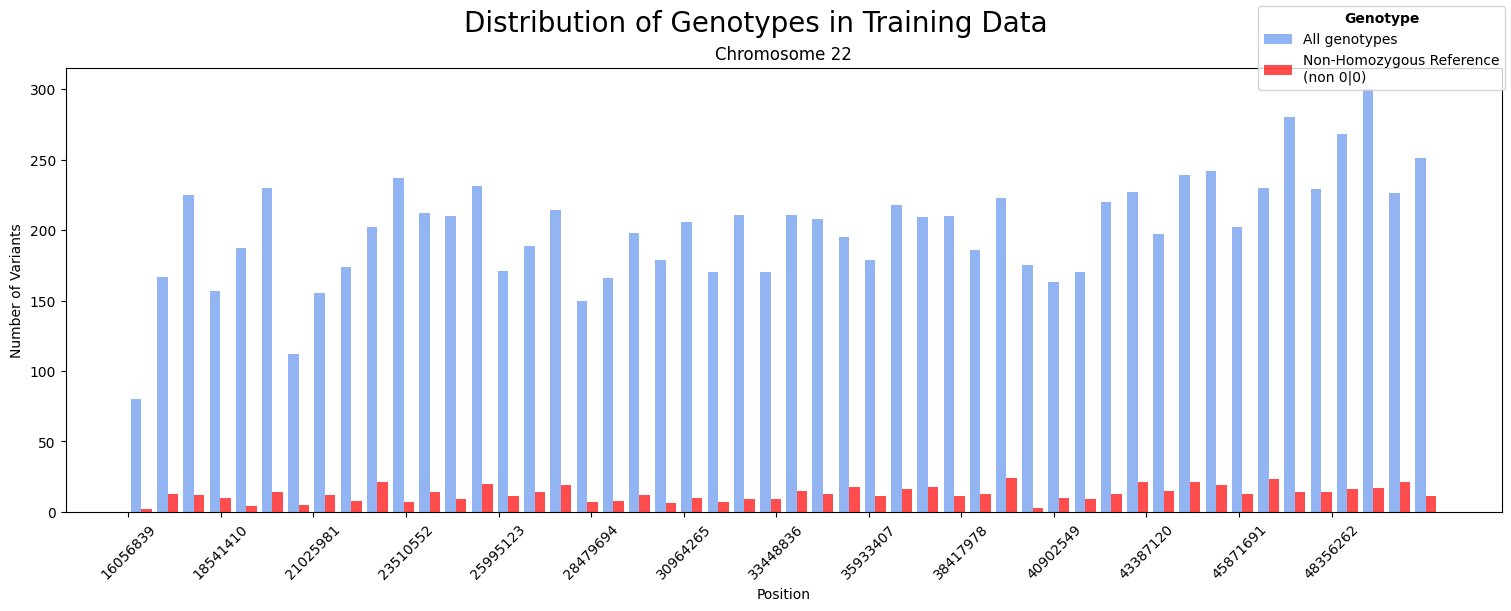

In [ ]:
plot_variant_distribution([train_valid_sequences[0], train_valid_sequences[0]],
                        title = "Distribution of Genotypes in Training Data", 
                        num_bins = 50, plot_alts_only=[False, True], colors = [train_color, rare_color],
                        model_names = ['All genotypes', 'Non-Homozygous Reference\n(non 0|0)'], 
                        share_axis = True,
                        legend_title = "Genotype", compare_dist = True, 
                        )#save_path=f'{SOURCE_DATA_FIGURES}/training_genotypes_dist')

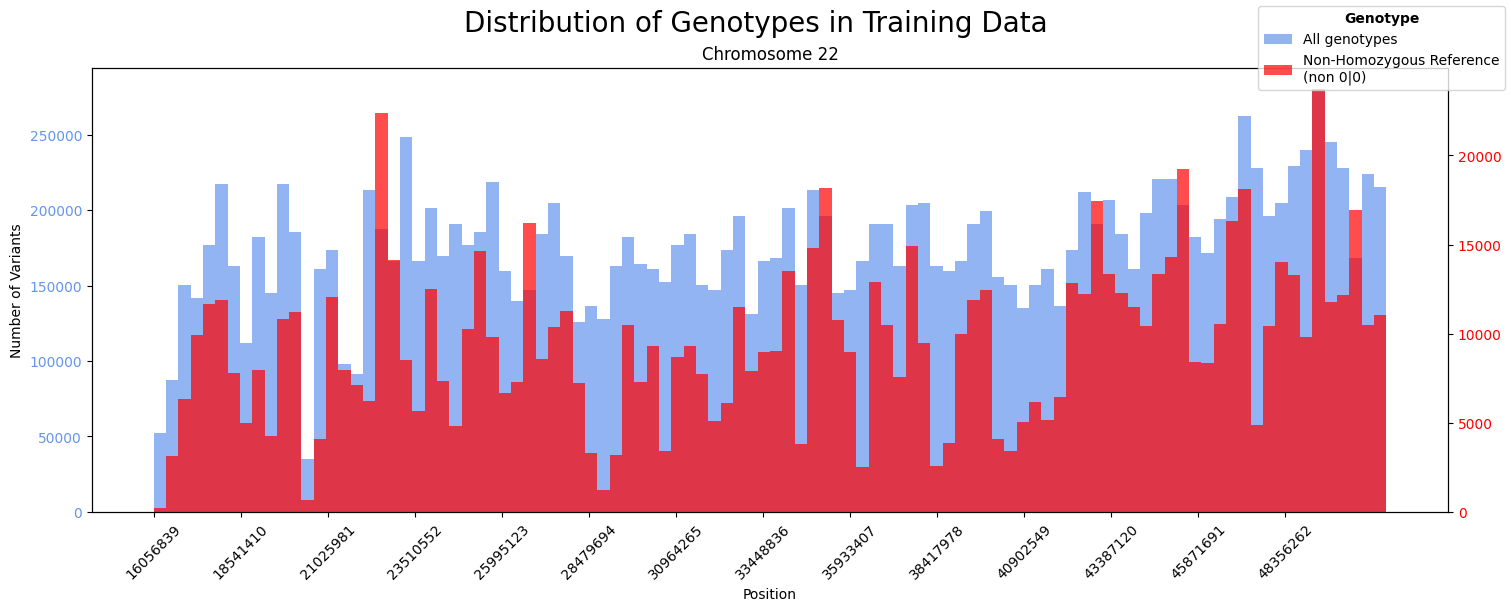

In [ ]:
grouped_train_sequences, _, all_train_grouped_sequences = get_valid_sequences(training_gts, has_sample_names=True, sample_wise=False)
plot_variant_distribution([grouped_train_sequences, grouped_train_sequences],
                        title = "Distribution of Genotypes in Training Data", 
                        num_bins = 100, plot_alts_only=[False, True], colors = [train_color, rare_color],
                        model_names = ['All genotypes', 'Non-Homozygous Reference\n(non 0|0)'], 
                        share_axis = False, legend_title = "Genotype", compare_dist = True, 
                        save_path=f'{SOURCE_DATA_FIGURES}/training_genotypes_dist_all_samples')

In [11]:
holdout_gts = get_sequences_from_file(HOLDOUT_DATA)
holdout_gts = [gt['genotypes'] for gt in holdout_gts]
holdout_valid_sequences, holdout_valid_sequences_ratio, all_holdout_sequences = get_valid_sequences(holdout_gts, has_sample_names=True, sample_wise=plot_sample_wise)

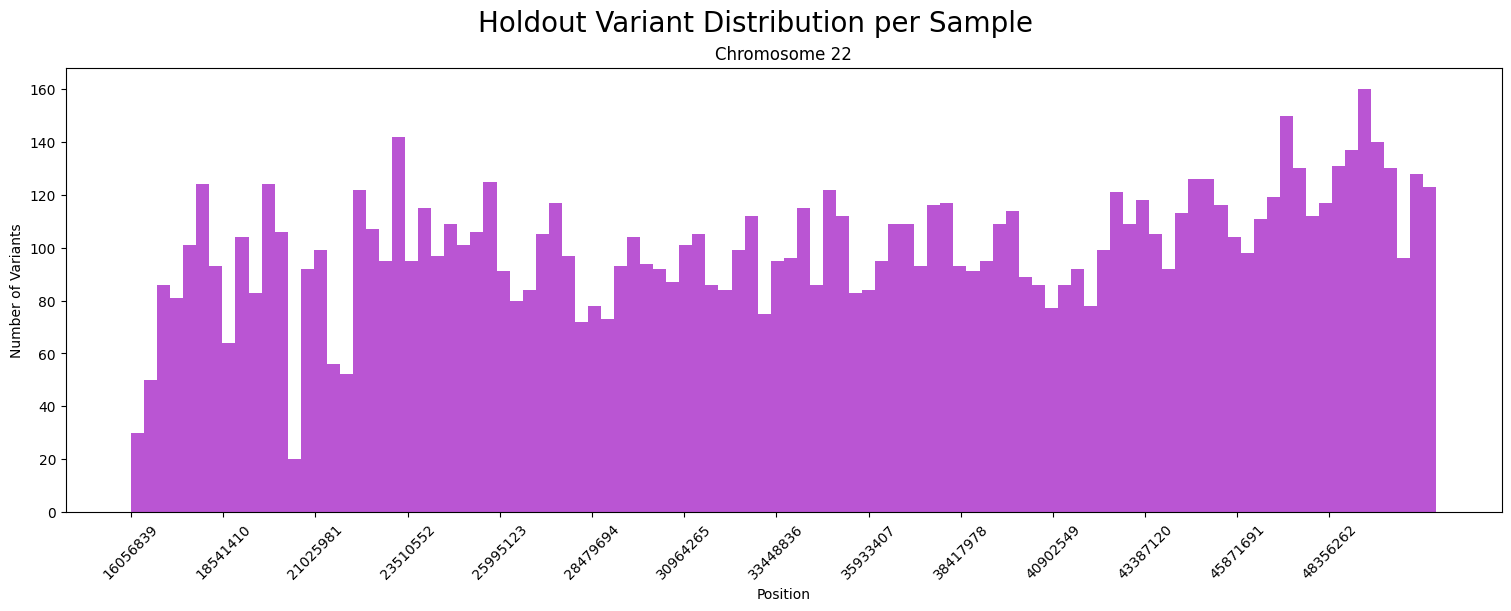

In [40]:
plot_variant_distribution(holdout_valid_sequences[0], title = "Holdout Variant Distribution per Sample", 
                        num_bins = 100, plot_alts_only=False, colors = [holdout_color],
                        save_path=f'{SOURCE_DATA_FIGURES}/holdout_data_variant_dist')

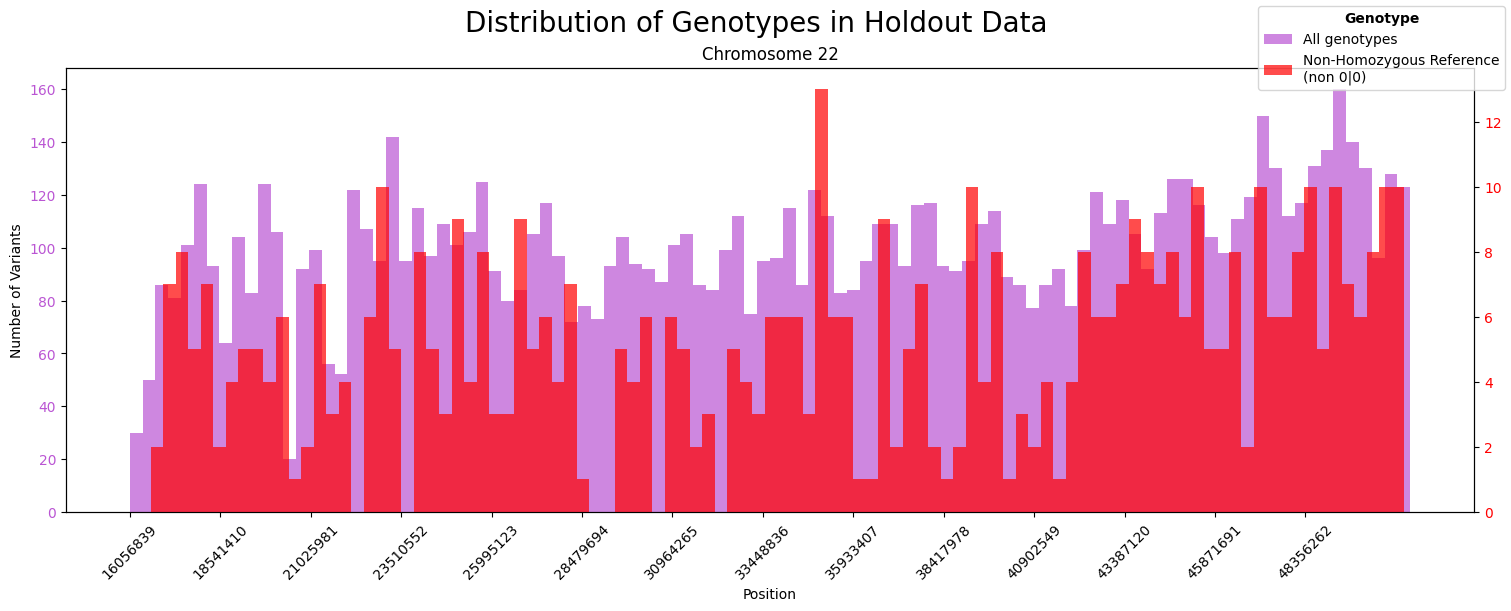

In [43]:
plot_variant_distribution([holdout_valid_sequences[0], holdout_valid_sequences[0]],
                        title = "Distribution of Genotypes in Holdout Data", 
                        num_bins = 100, plot_alts_only=[False, True], colors = [holdout_color, rare_color],
                        model_names = ['All genotypes', 'Non-Homozygous Reference\n(non 0|0)'], share_axis = False,
                        legend_title = "Genotype",
                        save_path=f'{SOURCE_DATA_FIGURES}/holdout_genotypes_dist')

___

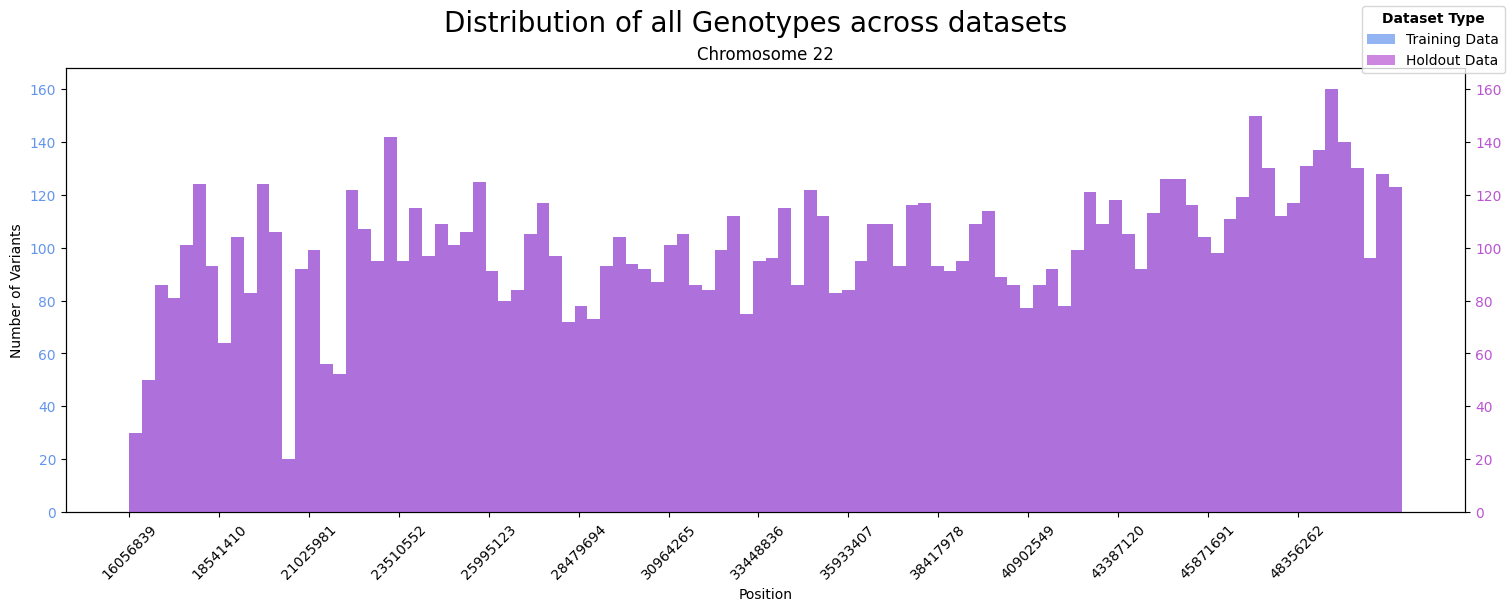

In [42]:
plot_variant_distribution([train_valid_sequences[0], holdout_valid_sequences[0]],
                        title = "Distribution of all Genotypes across datasets", 
                        num_bins = 100, plot_alts_only=False, colors = [train_color, holdout_color],
                        model_names = ['Training Data', 'Holdout Data'], share_axis = False,
                        legend_title = "Dataset Type",
                        save_path=f'{SOURCE_DATA_FIGURES}/train_vs_holdout_genotypes_dist')

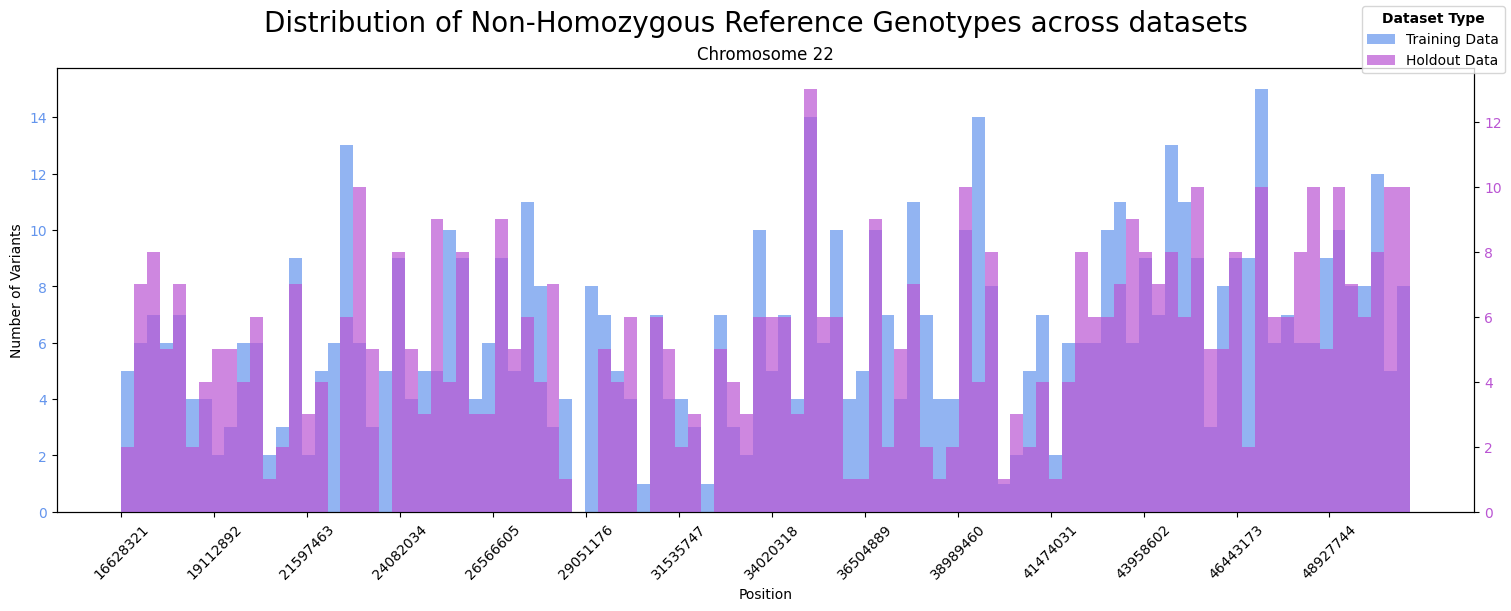

In [ ]:
plot_variant_distribution([train_valid_sequences[0], holdout_valid_sequences[0]],
                        title = "Distribution of Non-Homozygous Reference Genotypes across datasets", 
                        num_bins = 100, plot_alts_only=True, colors = [train_color, holdout_color],
                        model_names = ['Training Data', 'Holdout Data'], share_axis = False,
                        legend_title = "Dataset Type",
                        save_path=f'{SOURCE_DATA_FIGURES}/train_vs_holdout_alt_genotypes_dist')

___

In [ ]:
import json
with open(f'data/sources/rare_snps.txt') as f:
    rare_snps = (f.readlines())
rare_snps = [snp.rstrip('\n') for snp in rare_snps]

with open(f'data/sources/common_snps.txt') as f:
    common_snps = (f.readlines())
common_snps = [snp.rstrip('\n') for snp in common_snps]

common_color = '#3cbd49'

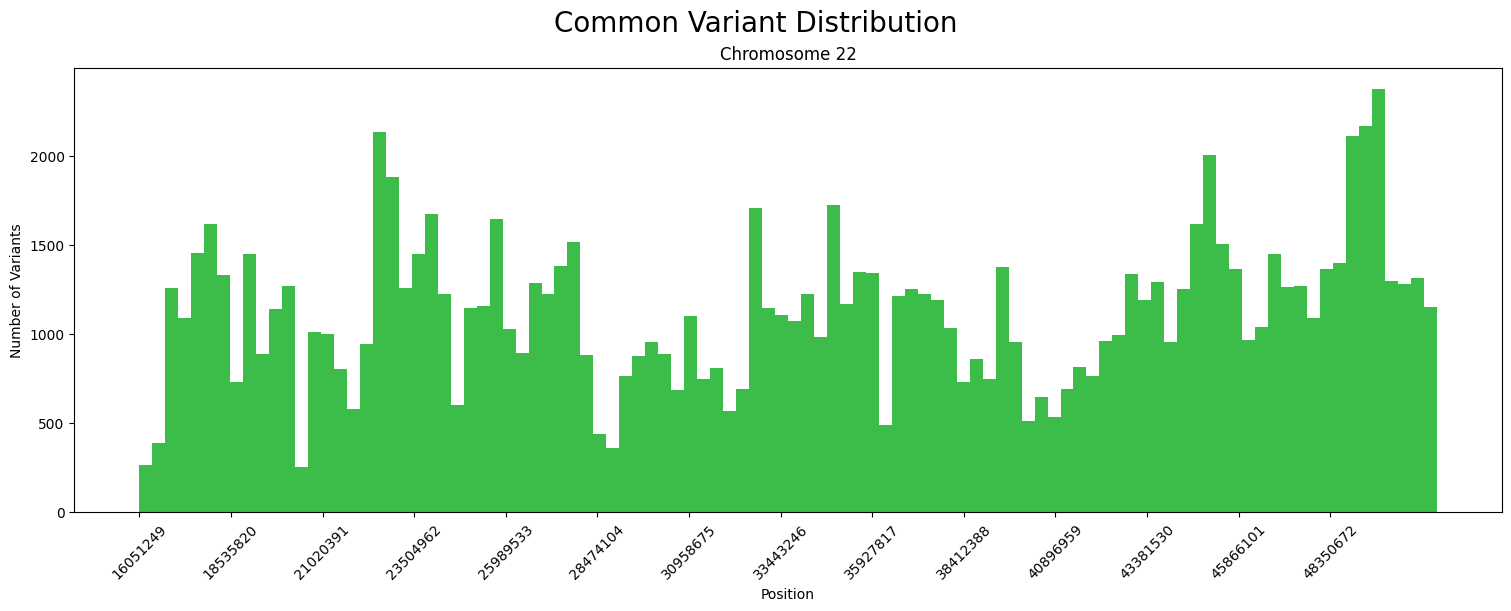

In [ ]:
plot_variant_distribution(common_snps, title = "Common Variant Distribution", 
                            num_bins = 100, plot_alts_only=False, colors = [common_color], has_gts=False, 
)#save_path=f'{SOURCE_DATA_FIGURES}/training_data_variant_dist')

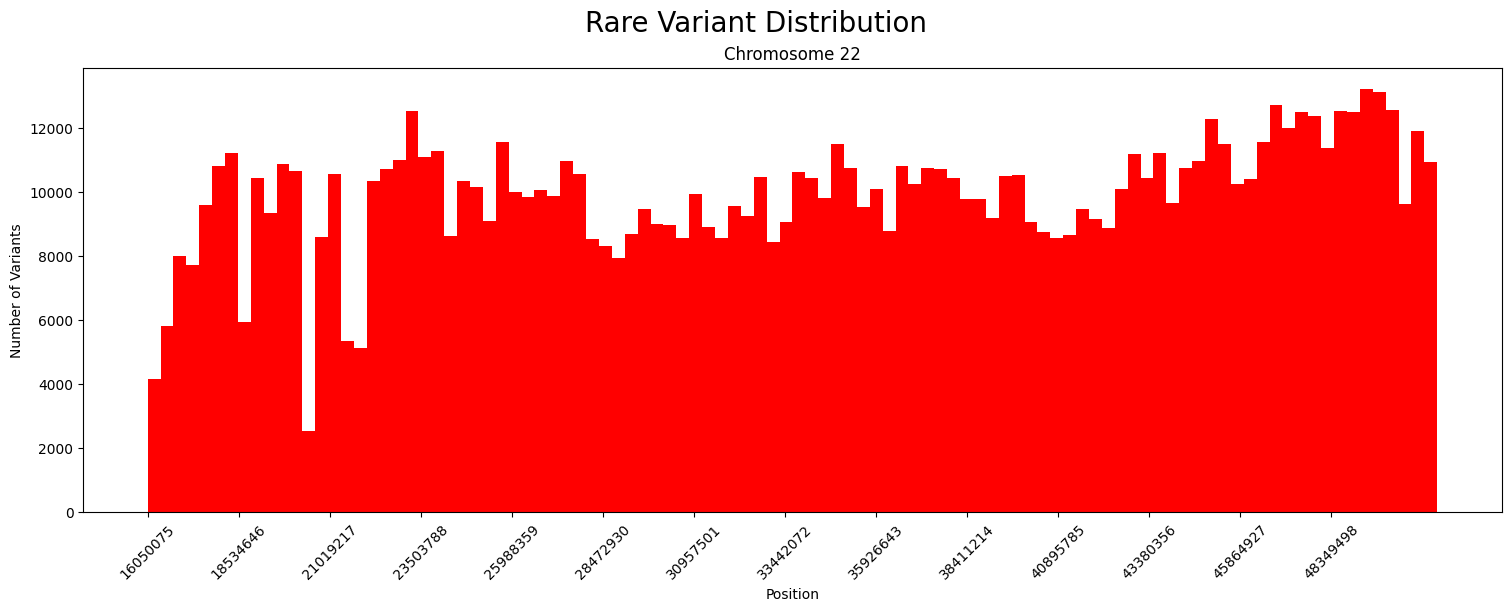

In [58]:
plot_variant_distribution(rare_snps, title = "Rare Variant Distribution", 
                            num_bins = 100, plot_alts_only=False, colors = [rare_color], has_gts=False, 
)#save_path=f'{SOURCE_DATA_FIGURES}/training_data_variant_dist')

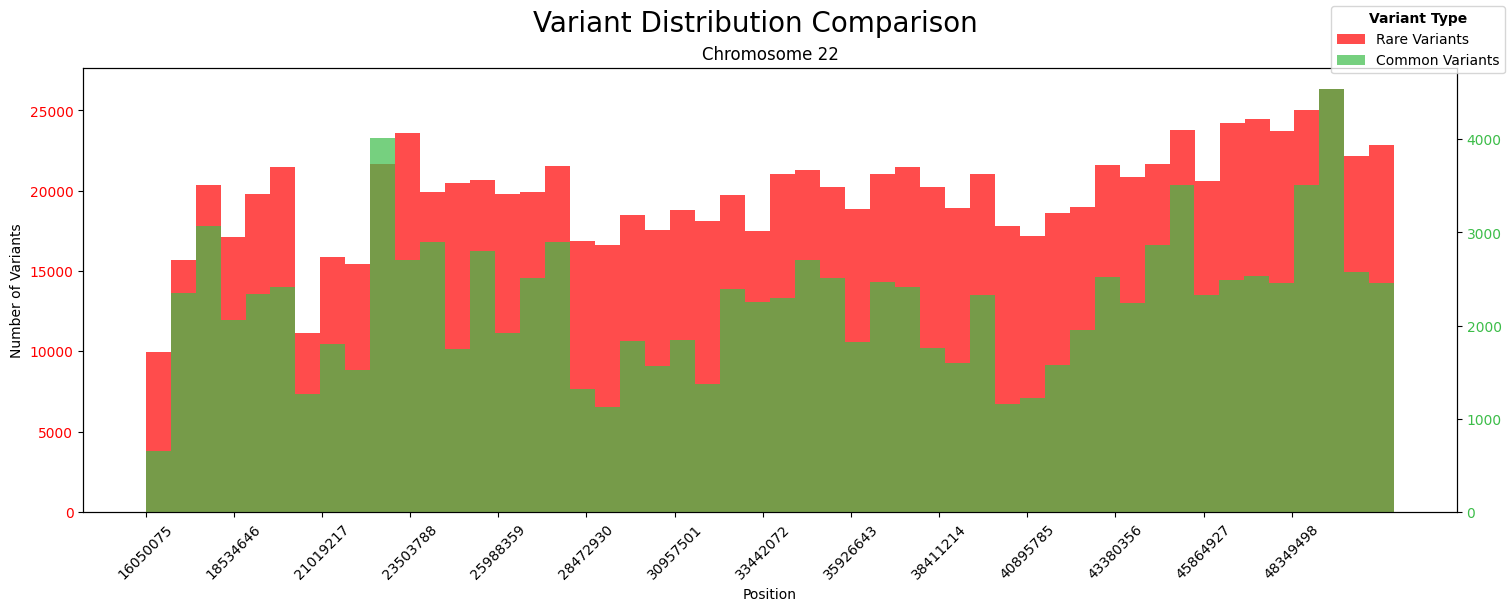

In [59]:
plot_variant_distribution([
                        rare_snps,
                        common_snps,
                        ], 
                        model_names = [
                            'Rare Variants',
                            'Common Variants',
                            ],
                        legend_title="Variant Type",
                        share_axis=False, sharey=False,
                        by_chr=True,
                        title = "Variant Distribution Comparison",
                        num_bins = 50,
                        plot_alts_only=False,
                        has_gts=False, 
                        colors = [rare_color, common_color],
                        save_path=f'{UTILITY_FIGURES}/rare_vs_common_variant_dist')

___


# 3. Allele Statistics

In [1]:
from importlib import reload
import metrics
reload(metrics)
from metrics import *
from data.data_utils import get_sequences_from_file
from metrics import *

/Users/asiabelfiore/Desktop/Thesis/code/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/asiabelfiore/Desktop/Thesis/code/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SOURCE_DATA_FIGURES = 'figures/source_data'
UTILITY_FIGURES = 'figures/generated_data/utility_eval'
PRIVACY_FIGURES = 'figures/generated_data/privacy_eval'

data_size = 'medium'
TRAIN_DATA = f'data/sources/json/{data_size}/train_gts_with_pop.json' 
HOLDOUT_DATA = f'data/sources/json/{data_size}/holdout_gts_with_pop.json'
VAL_DATA = f'data/sources/json/{data_size}/val_gts_with_pop.json'

chrom = '22'
model_version = 1
num_samples = 100  # 2504
plot_sample_wise = True

train_color = 'cornflowerblue'
holdout_color = 'mediumorchid'
rare_color = 'red'
training_gts = get_sequences_from_file(TRAIN_DATA)
training_gts = [gt['genotypes'] for gt in training_gts]
train_valid_sequences, train_valid_sequences_ratio, all_train_sequences = get_valid_sequences(training_gts, has_sample_names=True, sample_wise=plot_sample_wise)

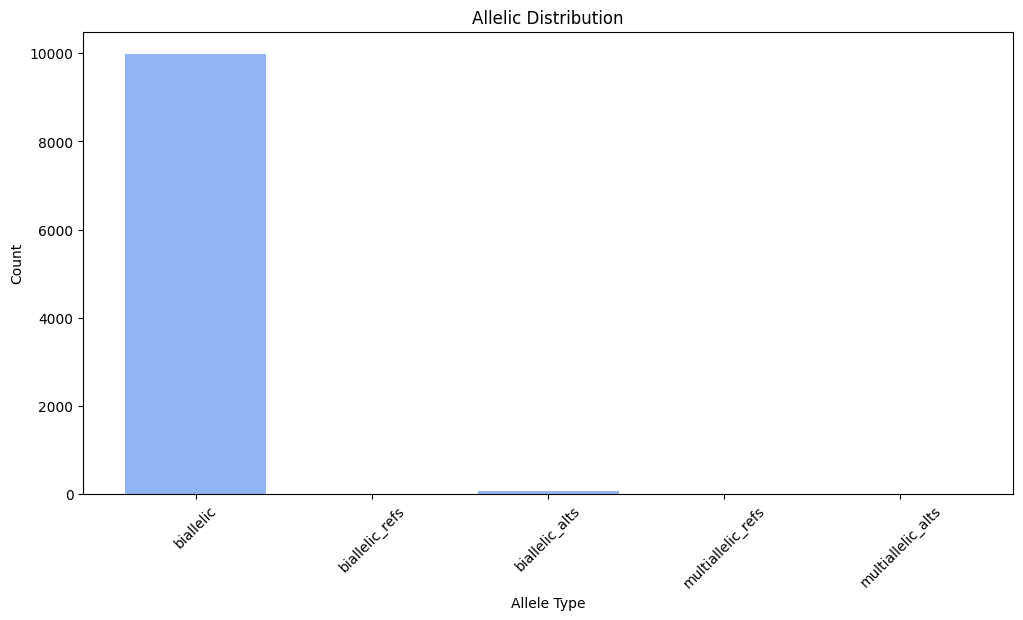

In [45]:
import matplotlib.pyplot as plt

allele_counts = get_allelic_distribution(train_valid_sequences, is_synthetic=False)

plt.figure(figsize=(12, 6))
plt.bar(allele_counts.keys(), allele_counts.values(), alpha=0.7, color='cornflowerblue')
plt.title("Allelic Distribution")
plt.xlabel("Allele Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

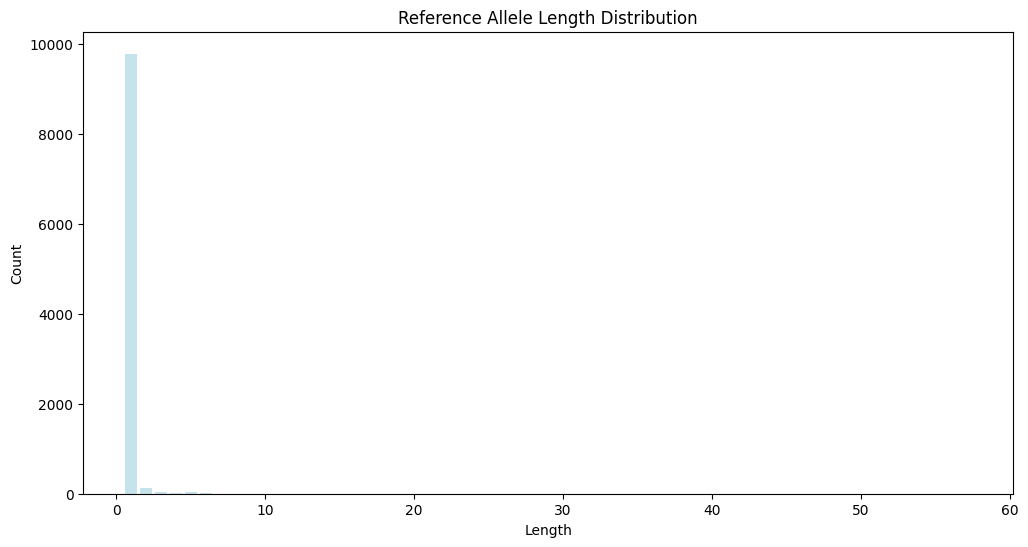

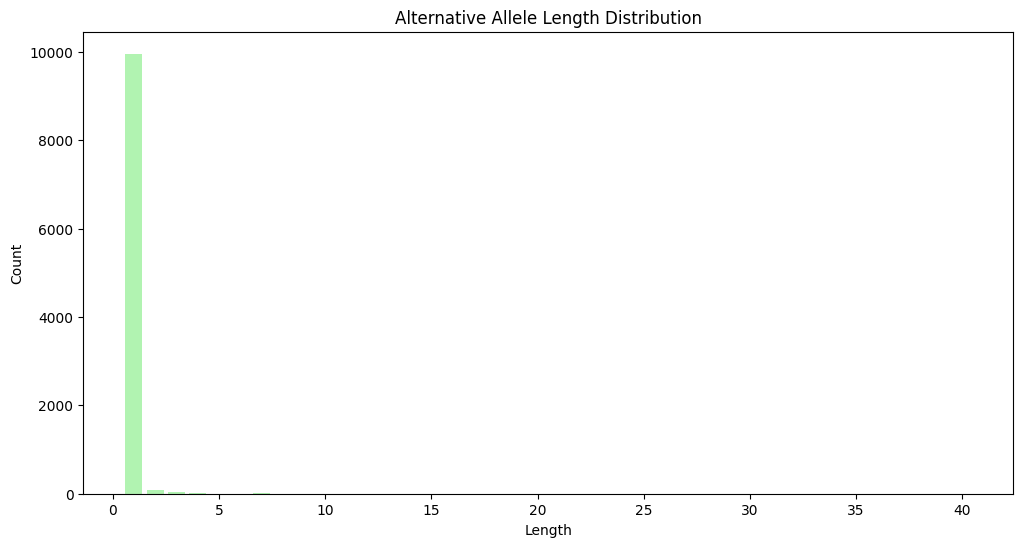

In [43]:
ref_allele_lengths, alt_allele_lengths = get_allele_length_distribution(train_valid_sequences, is_synthetic=False)

plt.figure(figsize=(12, 6))
plt.bar(ref_allele_lengths.keys(), ref_allele_lengths.values(), alpha=0.7, color='lightblue')
plt.title("Reference Allele Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(alt_allele_lengths.keys(), alt_allele_lengths.values(), alpha=0.7, color='lightgreen')
plt.title("Alternative Allele Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()